# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# read the data

In [2]:
df=pd.read_csv('./works/full-apple-tv-dataset/data.csv')
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112548.0,DE
1,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315889.0,"AU, CA, DE, US"
2,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,473046.0,"DE, GB"
3,Metropolis,movie,"Drama, Sci-Fi",1927.0,tt0017136,8.3,189498.0,GB
4,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1221592.0,"BR, CL, CO, MX"
...,...,...,...,...,...,...,...,...
17562,D+day,tv,Drama,2020.0,tt33338933,NaN,NaN,US
17563,"Kennedy, Sinatra and the Mafia",tv,"Crime, Documentary, History",2023.0,tt29685022,6.8,97.0,CA
17564,NaN,tv,Documentary,2023.0,NaN,NaN,NaN,DE
17565,These Stones,tv,Drama,2024.0,tt17492344,8.8,18.0,US


# data exploration

In [3]:
df.head(10)

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112548.0,DE
1,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315889.0,"AU, CA, DE, US"
2,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,473046.0,"DE, GB"
3,Metropolis,movie,"Drama, Sci-Fi",1927.0,tt0017136,8.3,189498.0,GB
4,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1221592.0,"BR, CL, CO, MX"
5,Apocalypse Now,movie,"Drama, Mystery, War",1979.0,tt0078788,8.4,724295.0,DE
6,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443712.0,US
7,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1103445.0,AU
8,Amores Perros,movie,"Drama, Thriller",2000.0,tt0245712,8.0,256551.0,"IN, US"
9,12 Monkeys,movie,"Mystery, Sci-Fi, Thriller",1995.0,tt0114746,8.0,655582.0,AU


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17567 entries, 0 to 17566
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               17081 non-null  object 
 1   type                17567 non-null  object 
 2   genres              16983 non-null  object 
 3   releaseYear         17545 non-null  float64
 4   imdbId              16268 non-null  object 
 5   imdbAverageRating   15860 non-null  float64
 6   imdbNumVotes        15860 non-null  float64
 7   availableCountries  17567 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.1+ MB


In [5]:
df.describe()

,releaseYear,imdbAverageRating,imdbNumVotes
count,17545.000000,15860.000000,1.586000e+04
mean,2006.625819,6.380851,2.606384e+04
std,17.881141,1.164461,1.000622e+05
min,1902.000000,1.300000,5.000000e+00
25%,2000.000000,5.700000,2.110000e+02
50%,2014.000000,6.500000,1.291500e+03
75%,2019.000000,7.200000,8.344000e+03
max,2025.000000,9.400000,2.315889e+06


# Data analysis and cleaning    


In [6]:
df.head(10)

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112548.0,DE
1,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315889.0,"AU, CA, DE, US"
2,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,473046.0,"DE, GB"
3,Metropolis,movie,"Drama, Sci-Fi",1927.0,tt0017136,8.3,189498.0,GB
4,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1221592.0,"BR, CL, CO, MX"
5,Apocalypse Now,movie,"Drama, Mystery, War",1979.0,tt0078788,8.4,724295.0,DE
6,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443712.0,US
7,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1103445.0,AU
8,Amores Perros,movie,"Drama, Thriller",2000.0,tt0245712,8.0,256551.0,"IN, US"
9,12 Monkeys,movie,"Mystery, Sci-Fi, Thriller",1995.0,tt0114746,8.0,655582.0,AU


In [7]:
# check null values
df.isnull().sum()

title                  486
type                     0
genres                 584
releaseYear             22
imdbId                1299
imdbAverageRating     1707
imdbNumVotes          1707
availableCountries       0
dtype: int64

In [8]:
# check null value percentage
null_percentage = df.isnull().mean() * 100
null_percentage_sorted = null_percentage.sort_values(ascending=False)
print(null_percentage_sorted)
# null_percentage

imdbAverageRating     9.717083
imdbNumVotes          9.717083
imdbId                7.394547
genres                3.324415
title                 2.766551
releaseYear           0.125235
type                  0.000000
availableCountries    0.000000
dtype: float64


since only small part of the data is null, we can use the following code to find the columns and fix them using median for numeric columns and `Unknown` for categorical columns



In [9]:
df.head(10)

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112548.0,DE
1,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315889.0,"AU, CA, DE, US"
2,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,473046.0,"DE, GB"
3,Metropolis,movie,"Drama, Sci-Fi",1927.0,tt0017136,8.3,189498.0,GB
4,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1221592.0,"BR, CL, CO, MX"
5,Apocalypse Now,movie,"Drama, Mystery, War",1979.0,tt0078788,8.4,724295.0,DE
6,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443712.0,US
7,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1103445.0,AU
8,Amores Perros,movie,"Drama, Thriller",2000.0,tt0245712,8.0,256551.0,"IN, US"
9,12 Monkeys,movie,"Mystery, Sci-Fi, Thriller",1995.0,tt0114746,8.0,655582.0,AU


In [10]:
# i use median even though i trust the guy who gave me the data : )
# https://research-collective.com/means-and-medians-when-to-use-which/#:~:text=Median%20better%20when%20there%20are,a%20distribution%20shape%20when%20used
df['releaseYear'].fillna(df['releaseYear'].median(), inplace=True)
df['imdbAverageRating'].fillna(df['imdbAverageRating'].median(), inplace=True)
df['imdbNumVotes'].fillna(df['imdbNumVotes'].median(), inplace=True)

df['title'].fillna('Unknown', inplace=True)
df['genres'].fillna('Unknown', inplace=True)
df['imdbId'].fillna('Unknown', inplace=True)

df
# df['releaseYear'].fillna(df['releaseYear'].median(), inplace=True)

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112548.0,DE
1,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315889.0,"AU, CA, DE, US"
2,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,473046.0,"DE, GB"
3,Metropolis,movie,"Drama, Sci-Fi",1927.0,tt0017136,8.3,189498.0,GB
4,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1221592.0,"BR, CL, CO, MX"
...,...,...,...,...,...,...,...,...
17562,D+day,tv,Drama,2020.0,tt33338933,6.5,1291.5,US
17563,"Kennedy, Sinatra and the Mafia",tv,"Crime, Documentary, History",2023.0,tt29685022,6.8,97.0,CA
17564,Unknown,tv,Documentary,2023.0,Unknown,6.5,1291.5,DE
17565,These Stones,tv,Drama,2024.0,tt17492344,8.8,18.0,US


In [11]:
df.tail(10)

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
17557,Worth the Hype,tv,Reality-TV,2023.0,tt29119422,8.3,7.0,US
17558,Unknown,tv,Unknown,2016.0,Unknown,6.5,1291.5,"CA, US"
17559,Unknown,tv,Unknown,2024.0,Unknown,6.5,1291.5,"AU, CA, US"
17560,Unknown,tv,Unknown,2024.0,Unknown,6.5,1291.5,US
17561,Unknown,tv,Unknown,2024.0,Unknown,6.5,1291.5,US
17562,D+day,tv,Drama,2020.0,tt33338933,6.5,1291.5,US
17563,"Kennedy, Sinatra and the Mafia",tv,"Crime, Documentary, History",2023.0,tt29685022,6.8,97.0,CA
17564,Unknown,tv,Documentary,2023.0,Unknown,6.5,1291.5,DE
17565,These Stones,tv,Drama,2024.0,tt17492344,8.8,18.0,US
17566,Unknown,tv,Unknown,2014.0,Unknown,6.5,1291.5,"AR, AT, AU, BO, BR, CA, CH, CL, CO, CR, DE, DO..."


replacing genres with array 


In [12]:
df['genres'] = df['genres'].apply(
    lambda x: [genre.strip().lower() for genre in x.split(', ') if genre != 'Unknown'] if pd.notna(x) else ['Unknown']
)
df['availableCountries']= df['availableCountries'].apply(
    lambda x: [country.strip().upper() for country in x.split(', ') if country != 'Unknown'] if pd.notna(x) else ['Unknown']
)
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,[comedy],1995.0,tt0113101,6.7,112548.0,[DE]
1,Forrest Gump,movie,"[drama, romance]",1994.0,tt0109830,8.8,2315889.0,"[AU, CA, DE, US]"
2,Citizen Kane,movie,"[drama, mystery]",1941.0,tt0033467,8.3,473046.0,"[DE, GB]"
3,Metropolis,movie,"[drama, sci-fi]",1927.0,tt0017136,8.3,189498.0,[GB]
4,Kill Bill: Vol. 1,movie,"[action, crime, thriller]",2003.0,tt0266697,8.2,1221592.0,"[BR, CL, CO, MX]"


# Exploratory data analysis

Count how many unique genres are in the dataset

In [13]:
# all_genres = df['genres'].explode()
# unique_genres = all_genres.unique()
# # len(unique_genres)
# unique_genres

all_genres = [genre for sublist in df['genres'] for genre in sublist]
genre_list=Counter(all_genres)
len(genre_list)


37

Count how many unique countries are available in the dataset

In [14]:
all_countries = [country for countryList in df['availableCountries'] for country in countryList]
# len(all_countries.value_counts())
country_counts = Counter(all_countries)
len(country_counts)

85

there are 37 genres and 85 unique countries

## genre distribution

In [15]:
genre_counts_df = pd.DataFrame(genre_list.items(), columns=['genre', 'count']) 
genre_counts_df

,genre,count
0,comedy,4574
1,drama,7969
2,romance,2655
3,mystery,1547
4,sci-fi,478
5,action,2114
6,crime,2525
7,thriller,2143
8,war,269
9,western,307


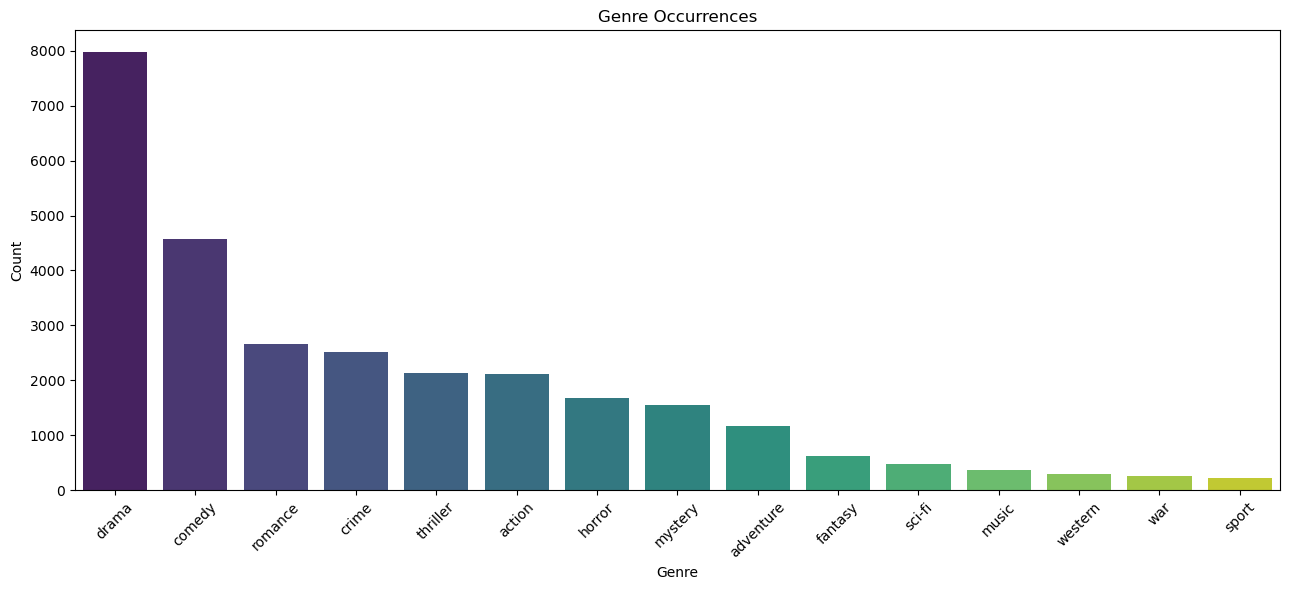

In [16]:
plt.figure(figsize=(13, 6))
sns.barplot(data=genre_counts_df.head(15).sort_values(by='count',ascending=False), x='genre', y='count', palette="viridis",hue='genre')
plt.title('Genre Occurrences')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x1200 with 0 Axes>

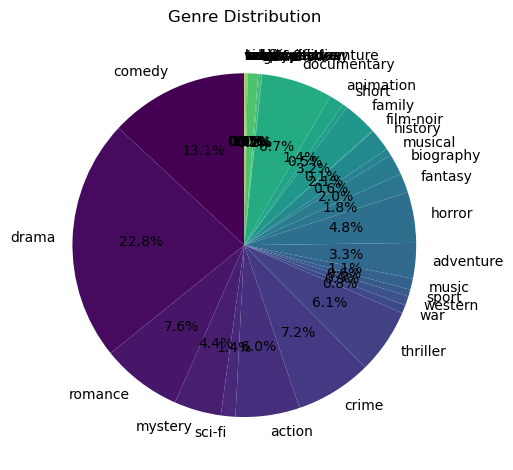

In [17]:
plt.figure(figsize=(12, 12))
genre_counts_df.set_index('genre').plot.pie(y='count', autopct='%1.1f%%', cmap="viridis", legend=False, startangle=90)
plt.title('Genre Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [18]:
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,[comedy],1995.0,tt0113101,6.7,112548.0,[DE]
1,Forrest Gump,movie,"[drama, romance]",1994.0,tt0109830,8.8,2315889.0,"[AU, CA, DE, US]"
2,Citizen Kane,movie,"[drama, mystery]",1941.0,tt0033467,8.3,473046.0,"[DE, GB]"
3,Metropolis,movie,"[drama, sci-fi]",1927.0,tt0017136,8.3,189498.0,[GB]
4,Kill Bill: Vol. 1,movie,"[action, crime, thriller]",2003.0,tt0266697,8.2,1221592.0,"[BR, CL, CO, MX]"


## IMDB distribution

###  Top Genres in Highly Rated Titles

In [26]:
high_rated_df = df[df['imdbAverageRating'] > 6.0]
high_rated_genres = high_rated_df['genres'].explode()

high_rated_genre_counts = Counter(high_rated_genres)
high_rated_genre_counts_df = pd.DataFrame(high_rated_genre_counts.items(), columns=['genre', 'count'])
high_rated_genre_counts_df = high_rated_genre_counts_df.sort_values(by='count', ascending=False)
high_rated_genre_counts_df.head(10)

,genre,count
1,drama,5689
0,comedy,2886
22,documentary,2200
6,crime,1856
2,romance,1732
5,action,1066
3,mystery,984
7,thriller,946
18,family,691
12,adventure,683


/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:374: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-.5, n - .5, auto=None)


<Figure size 1000x600 with 0 Axes>

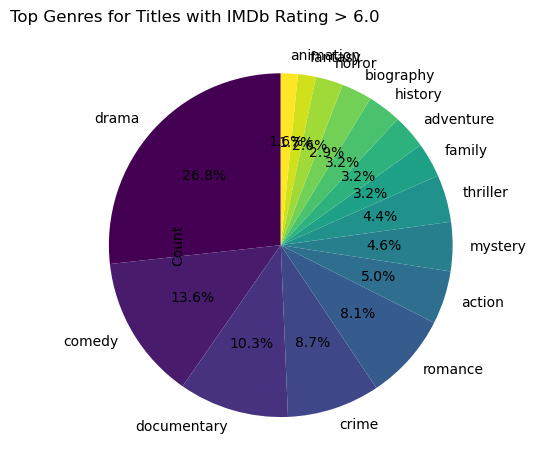

In [27]:
plt.figure(figsize=(10, 6))
high_rated_genre_counts_df.head(15).set_index('genre').plot.pie(y='count', autopct='%1.1f%%', cmap="viridis", legend=False, startangle=90)
sns.barplot(data=high_rated_genre_counts_df.head(15), x='genre', y='count', palette="viridis",hue='genre')
plt.title('Top Genres for Titles with IMDb Rating > 6.0')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Countries with Highest IMDb-Rated Titles

In [ ]:

# Explode countries for individual counts
high_rated_countries = high_rated_df['availableCountries'].dropna().explode()
country_counts = Counter(high_rated_countries)


country_counts_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count']).sort_values(by='Count', ascending=False)
country_counts_df


,Country,Count
3,US,7941
2,CA,2773
1,AU,2054
0,DE,1966
4,GB,1841
...,...,...
46,FI,220
75,SE,220
54,JO,220
42,DK,220


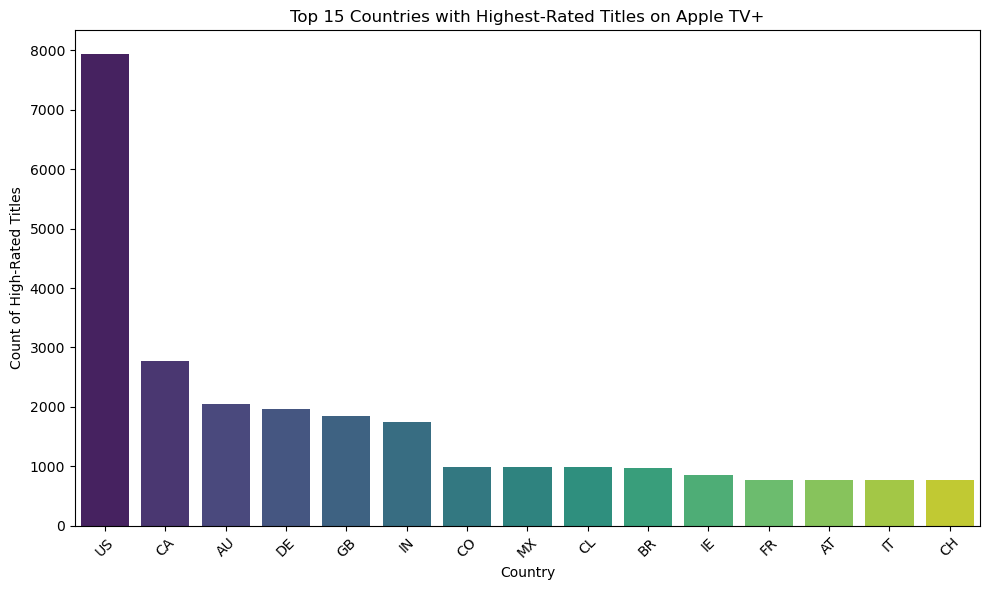

In [31]:
# Plot the top countries as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=country_counts_df.head(15), x='Country', y='Count', palette="viridis",hue='Country')
plt.title('Top 15 Countries with Highest-Rated Titles on Apple TV+')
plt.xlabel('Country')
plt.ylabel('Count of High-Rated Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Top 10 Most Popular Titles on Apple TV+ by IMDb Votes



In [35]:
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,[comedy],1995.0,tt0113101,6.7,112548.0,[DE]
1,Forrest Gump,movie,"[drama, romance]",1994.0,tt0109830,8.8,2315889.0,"[AU, CA, DE, US]"
2,Citizen Kane,movie,"[drama, mystery]",1941.0,tt0033467,8.3,473046.0,"[DE, GB]"
3,Metropolis,movie,"[drama, sci-fi]",1927.0,tt0017136,8.3,189498.0,[GB]
4,Kill Bill: Vol. 1,movie,"[action, crime, thriller]",2003.0,tt0266697,8.2,1221592.0,"[BR, CL, CO, MX]"


In [37]:
top_10_popular_titles_df = df.sort_values(by='imdbNumVotes', ascending=False).head(10)
top_10_popular_titles = top_10_popular_titles_df[['title', 'imdbNumVotes']]
top_10_popular_titles

,title,imdbNumVotes
1,Forrest Gump,2315889.0
198,Pulp Fiction,2272672.0
5168,Interstellar,2189254.0
79,The Godfather,2063251.0
3872,Django Unchained,1738454.0
22,Gladiator,1670481.0
3334,The Wolf of Wall Street,1631302.0
1755,Inglourious Basterds,1627060.0
240,Saving Private Ryan,1530053.0
1237,Shutter Island,1501659.0


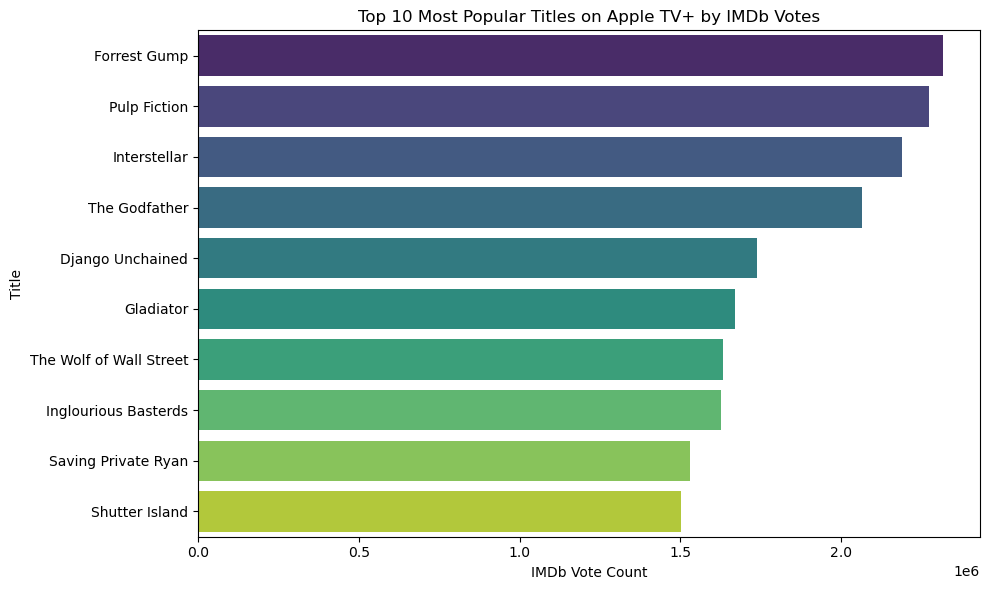

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_popular_titles, x='imdbNumVotes', y='title', palette="viridis",hue='title',legend=False)
plt.title('Top 10 Most Popular Titles on Apple TV+ by IMDb Votes')
plt.xlabel('IMDb Vote Count')
plt.ylabel('Title')
plt.tight_layout()
plt.show()

## Analyzing Titles Released After 2005 

In [40]:
recent_titles_df = df[df['releaseYear'] > 2005]
recent_genres = recent_titles_df['genres'].explode().dropna()
recent_genre_counts = Counter(recent_genres)
recent_titles_df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
14,Miami Vice,movie,"[action, crime, drama]",2006.0,tt0430357,6.1,125838.0,"[AU, US]"
60,Sin City: A Dame to Kill For,movie,"[action, crime, thriller]",2014.0,tt0458481,6.5,172589.0,"[CL, CO, IN, MX, US]"
71,Saw III,movie,"[horror, mystery, thriller]",2006.0,tt0489270,6.2,217310.0,"[BR, CL, CO, IN, MX]"
74,Indiana Jones and the Kingdom of the Crystal S...,movie,"[action, adventure]",2008.0,tt0367882,6.2,497014.0,"[AR, AU, BO, BR, CL, CO, CR, DO, EC, GT, HN, M..."
76,Volver,movie,"[comedy, drama]",2006.0,tt0441909,7.6,108734.0,[DE]
...,...,...,...,...,...,...,...,...
17562,D+day,tv,[drama],2020.0,tt33338933,6.5,1291.5,[US]
17563,"Kennedy, Sinatra and the Mafia",tv,"[crime, documentary, history]",2023.0,tt29685022,6.8,97.0,[CA]
17564,Unknown,tv,[documentary],2023.0,Unknown,6.5,1291.5,[DE]
17565,These Stones,tv,[drama],2024.0,tt17492344,8.8,18.0,[US]


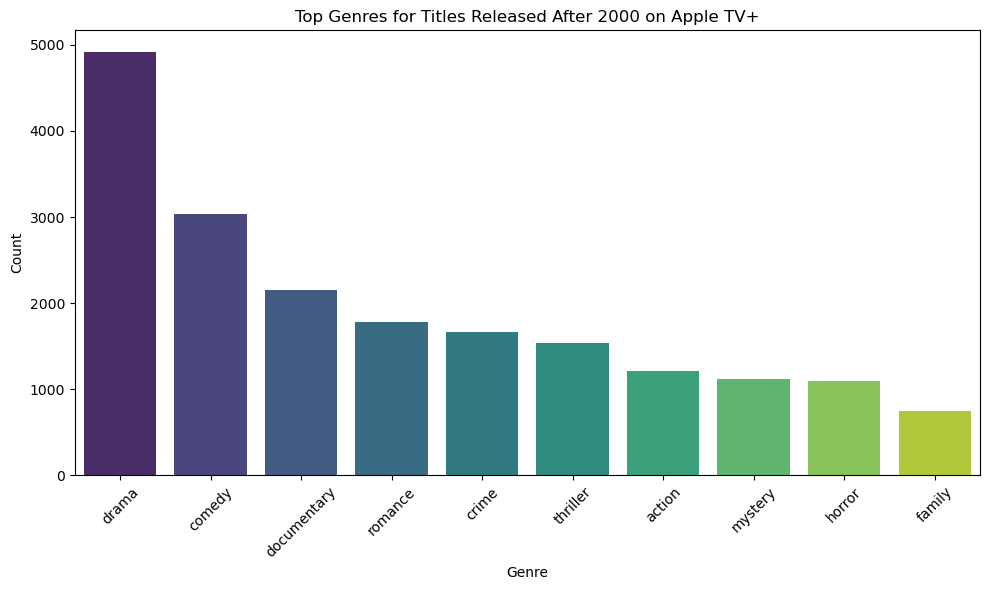

In [42]:
recent_genre_counts_df = pd.DataFrame(recent_genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=recent_genre_counts_df.head(10), x='Genre', y='Count', palette="viridis",hue='Genre',legend=False)
plt.title('Top Genres for Titles Released After 2000 on Apple TV+')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Predictions

## Future Popular Genres

In [ ]:
exploded_df = df.explode('genres').explode('availableCountries')

high_quality_df = exploded_df[exploded_df['imdbAverageRating'] > 6.5]

# Group by country and genre,count
region_genre_counts = high_quality_df.groupby(['availableCountries', 'genres']).size().reset_index(name='Count')
region_genre_counts = region_genre_counts.sort_values(by=['availableCountries', 'Count'], ascending=[True, False])
region_genre_counts

,availableCountries,genres,Count
7,AE,drama,70
4,AE,comedy,59
6,AE,documentary,50
2,AE,animation,44
8,AE,family,33
...,...,...,...
2043,ZA,musical,3
2048,ZA,short,3
2045,ZA,reality-tv,2
2052,ZA,war,2


In [45]:
# Filter recent years for trending analysis last 9 years
recent_years_df = high_quality_df[high_quality_df['releaseYear'] > 2015]

recent_region_genre_counts = recent_years_df.groupby(['availableCountries', 'genres']).size().reset_index(name='Count')
recent_region_genre_counts = recent_region_genre_counts.sort_values(by=['availableCountries', 'Count'], ascending=[True, False])
recent_region_genre_counts

,availableCountries,genres,Count
7,AE,drama,69
4,AE,comedy,48
6,AE,documentary,48
2,AE,animation,33
3,AE,biography,24
...,...,...,...
2013,ZA,musical,3
2018,ZA,short,3
2015,ZA,reality-tv,2
2022,ZA,war,2


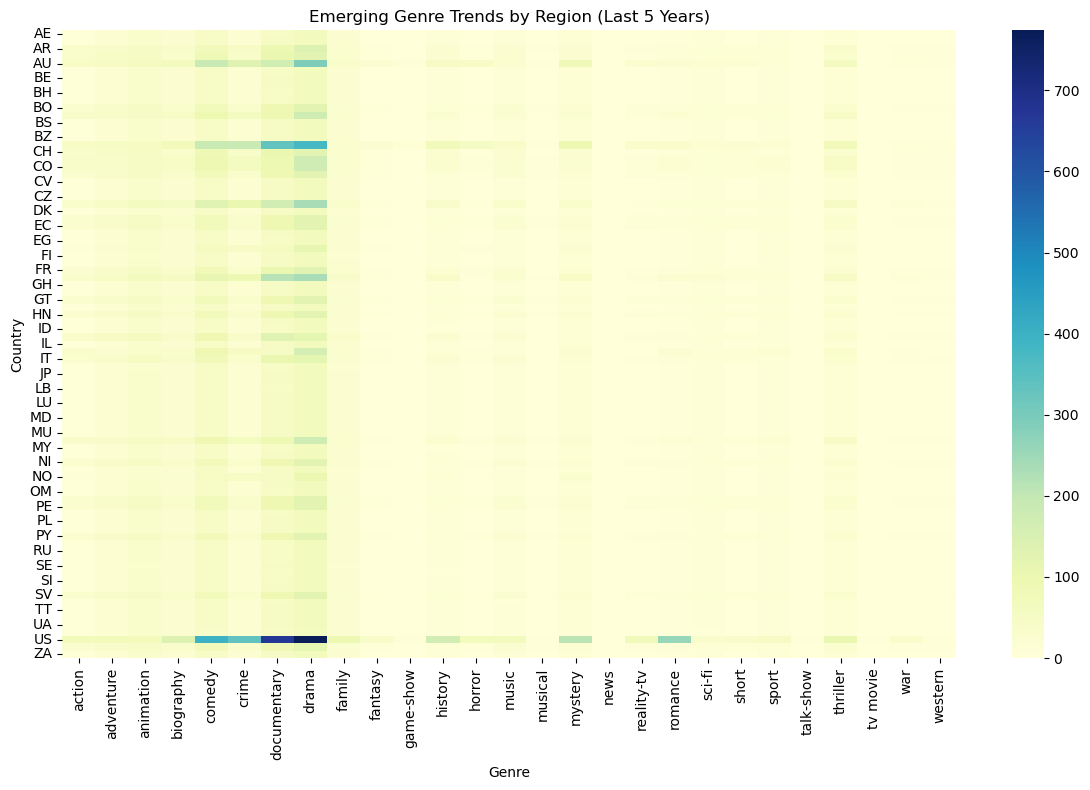

In [ ]:
region_genre_pivot = recent_region_genre_counts.pivot(index='availableCountries', columns='genres', values='Count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(region_genre_pivot, cmap="YlGnBu", annot=False, cbar=True)
plt.title('Emerging Genre Trends by Region (Last 5 Years)')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
